In [2]:
from pylab import *
from Bio import SeqIO
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
import pandas as pd
import re
import numpy as np
pd.options.mode.chained_assignment = None 
import io
from io import StringIO

In [3]:
df = pd.read_csv('proteusAll.tsv', sep="\t" ,low_memory=False) # read in the dataframe

In [4]:
df = df.drop_duplicates(subset='Sequence', keep="first") #REMOVE DUPLICATES
df

,Sequence,Modified sequence,Modifications,Proteins,Leading razor protein,Experiment,Charge,Reverse,Potential contaminant,Reporter intensity 1,Reporter intensity 2,Reporter intensity 3,Reporter intensity 4,Reporter intensity 5,Reporter intensity 6,Reporter intensity 7,Reporter intensity 8,Reporter intensity 9,Reporter intensity 10
0,AAAAAAAATMALAAPSSPTPESPTMLTK,_AAAAAAAATMALAAPSSPTPESPTMLTK_,Unmodified,INCENP,INCENP,1,4,NaN,NaN,1227.10,2029.8,1706.10,1627.90,2152.40,1703.40,1626.2,1878.30,1300.10,1281.10
1,AAAAAAAGDSDSWDADAFSVEDPVR,_(Acetyl (Protein N-term))AAAAAAAGDSDSWDADAFSV...,Acetyl (Protein N-term),EIF3J,EIF3J,1,3,NaN,NaN,3567.00,6282.9,5224.40,6393.70,3946.40,3680.90,3678.1,5648.10,2974.00,2880.20
3,AAAAAAAGDSDSWDADAFSVEDPVRK,_(Acetyl (Protein N-term))AAAAAAAGDSDSWDADAFSV...,Acetyl (Protein N-term),EIF3J,EIF3J,1,3,NaN,NaN,9892.50,12415.0,10484.00,8091.60,10791.00,7756.90,9398.8,10201.00,3995.00,6233.10
6,AAAAAAALQAK,_AAAAAAALQAK_,Unmodified,RPL4,RPL4,1,3,NaN,NaN,1432.70,2065.6,1541.50,1309.60,1399.40,1293.00,1301.9,1506.40,973.21,933.73
10,AAAAAAGAASGLPGPVAQGLK,_(Acetyl (Protein N-term))AAAAAAGAASGLPGPVAQGLK_,Acetyl (Protein N-term),IPO9,IPO9,1,3,NaN,NaN,2484.60,2721.5,2206.10,1993.40,2238.30,1884.80,2516.6,2614.40,996.36,1732.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98547,YYTGNYDQYVK,_YYTGNYDQYVK_,Unmodified,ABCF2,ABCF2,1,2,NaN,NaN,28702.00,33926.0,26287.00,24007.00,29749.00,25552.00,22878.0,25038.00,20123.00,27010.00
98548,YYTLEEIQK,_YYTLEEIQK_,Unmodified,CYB5A,CYB5A,1,2,NaN,NaN,21173.00,22902.0,23303.00,17612.00,20777.00,15935.00,26222.0,23007.00,9133.50,8874.80
98550,YYTLFGR,_YYTLFGR_,Unmodified,EPRS1,EPRS1,1,2,NaN,NaN,4363.60,5652.1,4262.50,4063.70,4836.70,4661.00,4770.3,4726.30,2351.40,2785.60
98551,YYTSASGDEMVSLK,_YYTSASGDEM(Oxidation (M))VSLK_,Oxidation (M),HSP90AA1,HSP90AA1,1,3,NaN,NaN,4335.30,4694.8,3483.10,5046.20,5346.70,5158.70,7120.2,4489.20,2699.60,3253.30


In [5]:
all_protein= []   #list of protein names
for proteins in df['Proteins']:
    all_protein.append(proteins.split(","))




In [6]:
protein_names = [] #list of all unique protein names
for p in all_protein:
    if p not in protein_names:
        protein_names.append(p)

In [7]:
len(all_protein)

43983

In [8]:
len(protein_names)

5936

In [9]:
with open('protein_names.txt', 'w') as f: #write protein names to file
    for proteins in protein_names: #for each protein in the list
        for protein in proteins: #for each protein in the list
            f.write("%s\n" % protein) #write each protein to file

In [10]:
df= df.filter(['Sequence', 'Proteins', 'Modifications']) #filter dataframe to only include protein names and sequences
df

,Sequence,Proteins,Modifications
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term)
3,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term)
6,AAAAAAALQAK,RPL4,Unmodified
10,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term)
...,...,...,...
98547,YYTGNYDQYVK,ABCF2,Unmodified
98548,YYTLEEIQK,CYB5A,Unmodified
98550,YYTLFGR,EPRS1,Unmodified
98551,YYTSASGDEMVSLK,HSP90AA1,Oxidation (M)


In [11]:
proteinID = pd.read_csv('ID.tsv' , sep="\t") #read in protein ID file
proteinID

,Entry,ProteinID
0,Q9NQS7,INCENP
1,O75822,EIF3J
2,P36578,RPL4
3,Q86X55,CARM1
4,O00410,IPO5
...,...,...
5261,Q12982,BNIP2
5262,P30307,CDC25C
5263,Q9NWZ8,GEMIN8
5264,Q14746,COG2


In [12]:
proteinID = proteinID.drop_duplicates(subset='ProteinID', keep="first")
proteinID.to_csv('ID.tsv', sep="\t", index=False)
proteinID

,Entry,ProteinID
0,Q9NQS7,INCENP
1,O75822,EIF3J
2,P36578,RPL4
3,Q86X55,CARM1
4,O00410,IPO5
...,...,...
5261,Q12982,BNIP2
5262,P30307,CDC25C
5263,Q9NWZ8,GEMIN8
5264,Q14746,COG2


In [13]:
df = df.merge(proteinID, left_on='Proteins', right_on='ProteinID', how='left') #merge protein names with protein ID
df

,Sequence,Proteins,Modifications,Entry,ProteinID
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified,Q9NQS7,INCENP
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term),O75822,EIF3J
2,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,EIF3J
3,AAAAAAALQAK,RPL4,Unmodified,P36578,RPL4
4,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term),Q96P70,IPO9
...,...,...,...,...,...
43978,YYTGNYDQYVK,ABCF2,Unmodified,Q9UG63,ABCF2
43979,YYTLEEIQK,CYB5A,Unmodified,P00167,CYB5A
43980,YYTLFGR,EPRS1,Unmodified,P07814,EPRS1
43981,YYTSASGDEMVSLK,HSP90AA1,Oxidation (M),P07900,HSP90AA1


In [14]:
df.to_csv('merged_proteins.tsv', sep="\t", index=False) #write merged dataframe to file

In [15]:
df= df.filter(['Sequence', 'Proteins', 'Modifications' , 'Entry']) #remove columns that are not needed
df= df[df['Entry'].notnull()] #remove rows with null values
df

,Sequence,Proteins,Modifications,Entry
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified,Q9NQS7
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term),O75822
2,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822
3,AAAAAAALQAK,RPL4,Unmodified,P36578
4,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term),Q96P70
...,...,...,...,...
43977,YYTEFPTVLDITAEDPSK,HAT1,Unmodified,O14929
43978,YYTGNYDQYVK,ABCF2,Unmodified,Q9UG63
43979,YYTLEEIQK,CYB5A,Unmodified,P00167
43980,YYTLFGR,EPRS1,Unmodified,P07814


In [16]:
with open('protein_seq.fasta') as fasta_file:  # Will close handle cleanly
    identifiers = []
    seq = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        seq.append(seq_record.seq)

In [17]:
new_df = pd.DataFrame({'Identifier': identifiers, 'Protein_Sequence': seq}) #create new dataframe with identifiers and sequences

proteinID = r'sp\|(.*)\|.*' #regular expression to extract protein ID
new_df['Identifier'] = [re.sub(proteinID, r'\1', x) for x in new_df['Identifier']] #remove protein ID from identifier

def list_to_string(list):   #convert list to string
    return ','.join(list)   #join list with ','
new_df['Protein_Sequence'] = new_df['Protein_Sequence'].apply(list_to_string) #convert list to string

#df['col'].apply(', '.join)

new_df['Protein_Sequence'] = new_df['Protein_Sequence'].str.replace(',', '') #remove ',' from string




In [18]:
new_df

,Identifier,Protein_Sequence
0,Q9NQS7,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...
1,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...
2,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...
3,Q86X55,MAAAAAAVGPGAGGAGSAVPGGAGPCATVSVFPGARLLTIGDANGE...
4,O00410,MAAAAAEQQQFYLLLGNLLSPDNVVRKQAEETYENIPGQSKITFLL...
...,...,...
5278,Q12982,MEGVELKEEWQDEDFPIPLPEDDSIEADILAITGPEDQPGSLEVNG...
5279,P30307,MSTELFSSTREEGSSGSGPSFRSNQRKMLNLLLERDTSFTVCPDVP...
5280,Q9NWZ8,MAAVKASTSKATRPWYSHPVYARYWQHYHQAMAWMQSHHNAYRKAV...
5281,Q14746,MEKSRMNLPKGPDTLCFDKDEFMKEDFDVDHFVSDCRKRVQLEELR...


In [19]:
new_df.to_csv('check_seq.tsv', sep="\t", index=False) 

In [20]:
#df = df.merge(proteinID, left_on='Proteins', right_on='ProteinID', how='left') #merge protein names with protein ID


df= df.merge(new_df, left_on='Entry', right_on='Identifier', how='left') #merge protein names with protein ID

In [21]:
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified,Q9NQS7,Q9NQS7,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...
2,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...
3,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...
4,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term),Q96P70,Q96P70,MAAAAAAGAASGLPGPVAQGLKEALVDTLTGILSPVQEVRAAAEEQ...
...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,HAT1,Unmodified,O14929,O14929,MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLEN...
40727,YYTGNYDQYVK,ABCF2,Unmodified,Q9UG63,Q9UG63,MPSDLAKKKAAKKKEAAKARQRPRKGHEENGDVVTEPQVAEKNEAN...
40728,YYTLEEIQK,CYB5A,Unmodified,P00167,P00167,MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPG...
40729,YYTLFGR,EPRS1,Unmodified,P07814,P07814,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...


In [22]:
def check_Sequence_in_Protein_Sequence(row): #function to check if sequence is in full sequence
    if row['Sequence'] in row['Protein_Sequence']:
        return True
    else:
        return False
        

In [23]:
df['Check'] = df.apply(check_Sequence_in_Protein_Sequence, axis=1) #apply function to dataframe

In [24]:
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified,Q9NQS7,Q9NQS7,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,True
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True
2,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True
3,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True
4,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term),Q96P70,Q96P70,MAAAAAAGAASGLPGPVAQGLKEALVDTLTGILSPVQEVRAAAEEQ...,True
...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,HAT1,Unmodified,O14929,O14929,MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLEN...,True
40727,YYTGNYDQYVK,ABCF2,Unmodified,Q9UG63,Q9UG63,MPSDLAKKKAAKKKEAAKARQRPRKGHEENGDVVTEPQVAEKNEAN...,True
40728,YYTLEEIQK,CYB5A,Unmodified,P00167,P00167,MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPG...,True
40729,YYTLFGR,EPRS1,Unmodified,P07814,P07814,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...,True


In [25]:
df['Check'].value_counts() #count number of trues and falses

True     40092
False      639
Name: Check, dtype: int64

In [26]:
df = df[df.Check != False] #remove rows that are false
df


,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified,Q9NQS7,Q9NQS7,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,True
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True
2,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True
3,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True
4,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term),Q96P70,Q96P70,MAAAAAAGAASGLPGPVAQGLKEALVDTLTGILSPVQEVRAAAEEQ...,True
...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,HAT1,Unmodified,O14929,O14929,MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLEN...,True
40727,YYTGNYDQYVK,ABCF2,Unmodified,Q9UG63,Q9UG63,MPSDLAKKKAAKKKEAAKARQRPRKGHEENGDVVTEPQVAEKNEAN...,True
40728,YYTLEEIQK,CYB5A,Unmodified,P00167,P00167,MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPG...,True
40729,YYTLFGR,EPRS1,Unmodified,P07814,P07814,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...,True


In [27]:
def peptide_start_position(protein, peptide): #This function finds the start position of the peptide in the protein sequence   
    for p in peptide:
        start_position= protein.find(peptide) #find start position of peptide in protein sequence  
        return start_position+1 #return start position of peptide in protein sequence

def peptide_end_position(protein, peptide): #This function finds the end position of the peptide in the protein sequence
    for p in peptide: 
        start_position= protein.find(peptide) #find start position of peptide in protein sequence
        end_position= start_position+len(peptide)-1 #find end position of peptide in protein sequence
        return end_position+1 #return end position of peptide

def find_peptide(protein, peptide): #This function finds the next AA after the peptide in the protein sequence
    try:
        position = protein.find(peptide) #find position of peptide in protein sequence
        next_position= position+len(str(peptide)) #find next position of peptide in protein sequence
        return protein[next_position]   #return next AA of peptide
        
    except:
        return ''

def find_last_AA(protein, peptide): #This function finds the last AA of the peptide in the protein sequence
    
    try:
        position = protein.find(peptide) #find position of peptide in protein sequence
        last_position_amino_acid= position + len(peptide)-1 #find last position of peptide in protein sequence

        return protein[last_position_amino_acid] #return last AA of peptide
    except:
        return ''

def next_2_AA(protein, peptide): #This function finds the next 2 AA after the peptide in the protein sequence
    try:
        position = protein.find(peptide) #find position of peptide in protein sequence
        last_position_amino_acid= position + len(peptide)-1 #find last position of peptide in protein sequence
        next_position= position+len(str(peptide)) #find next position of peptide in protein sequence
        return protein[last_position_amino_acid:next_position+1] #return next 5 AA of peptide
    except:
        return ''    


In [28]:
df['start']= df.apply(lambda row: peptide_start_position(row['Protein_Sequence'], row['Sequence']), axis=1) #apply function to dataframe
df['end']= df.apply(lambda row: peptide_end_position(row['Protein_Sequence'], row['Sequence']), axis=1) 
df['last_AA']= df.apply(lambda row: find_last_AA(row['Protein_Sequence'], row['Sequence']), axis=1)
df['next_AA']= df.apply(lambda row: find_peptide(row['Protein_Sequence'], row['Sequence']), axis=1)
df


,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified,Q9NQS7,Q9NQS7,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,True,127,154,K,K
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,26,R,K
2,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,V
3,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,S
4,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term),Q96P70,Q96P70,MAAAAAAGAASGLPGPVAQGLKEALVDTLTGILSPVQEVRAAAEEQ...,True,2,22,K,E
...,...,...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,HAT1,Unmodified,O14929,O14929,MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLEN...,True,263,280,K,S
40727,YYTGNYDQYVK,ABCF2,Unmodified,Q9UG63,Q9UG63,MPSDLAKKKAAKKKEAAKARQRPRKGHEENGDVVTEPQVAEKNEAN...,True,305,315,K,T
40728,YYTLEEIQK,CYB5A,Unmodified,P00167,P00167,MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPG...,True,11,19,K,H
40729,YYTLFGR,EPRS1,Unmodified,P07814,P07814,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...,True,1504,1510,R,S


In [29]:
df = df[df.Protein_Sequence != ''] #remove rows with empty protein sequences

In [30]:
p_count= (df['next_AA'] == 'P').sum() #count number of P's
p_count

391

In [31]:
reg= r".*[RK]P.*" #regular expression to find R|K P
df_RK= df[df.Sequence.str.match(reg)] #filter dataframe to only include peptides with R|K P

In [32]:
df_RK

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA
25,AAAEEEPKPK,ADK,Acetyl (Protein N-term),P55263,P55263,MAAAEEEPKPKKLKVEAPQALRENILFGMGNPLLDISAVVDKDFLD...,True,2,11,K,K
40,AAAHHYGAQCDKPNK,NDUFA8,Unmodified,P51970,P51970,MPGIVELPTLEELKVDEVKISSAVLKAAAHHYGAQCDKPNKEFMLC...,True,27,41,K,E
48,AAALGASGGAGAGDDDFDQFDKPGAER,RBM33,Acetyl (Protein N-term),Q96EV2,Q96EV2,MAAALGASGGAGAGDDDFDQFDKPGAERSWRRRAADEDWDSELEDD...,True,2,28,R,S
51,AAAMETEQLGVEIFETADCEENIESQDRPK,DPP8,Acetyl (Protein N-term),Q6V1X1,Q6V1X1,MWKRSEQMKIKSGKCNMAAAMETEQLGVEIFETADCEENIESQDRP...,True,18,47,K,L
55,AAAPRPPVSAASGRPQDDTDSSR,WIPF2,Unmodified,Q8TF74,Q8TF74,MPIPPPPPPPPGPPPPPTFHQANTEQPKLSRDEQRGRGALLQDICK...,True,120,142,R,A
...,...,...,...,...,...,...,...,...,...,...,...
40657,YVVISQGLDKPR,LRP1,Unmodified,Q07954,Q07954,MLTPPLLLLLPLLSALVAAAIDAPKTCSPKQFACRDQITCISKGWR...,True,2000,2011,R,A
40660,YVWLVYEQDRPLK,PEBP1,Unmodified,P30086,P30086,MPVDLSKWSGPLSLQEVDEQPQHPLHVTYAGAAVDELGKVLTPTQV...,True,120,132,K,C
40667,YWKPTGTPK,MGLL,Unmodified,Q99685,Q99685,MPEESSPRRTPQSIPYQDLPHLVNADGQYLFCRYWKPTGTPKALIF...,True,34,42,K,A
40721,YYRPTEVDFLQGDCTK,GMDS,Unmodified,O60547,O60547,MAHAPARCPSARGSGDGEMGKPRNVALITGITGQDGSYLAEFLLEK...,True,323,338,K,A


In [33]:
df_RK['next_AA'].value_counts() 

L    235
K    208
V    163
E    159
A    158
S    147
R    132
T    130
G    123
I    121
D     94
Q     91
N     74
F     73
Y     56
      52
P     43
M     41
H     36
C     31
W     18
Name: next_AA, dtype: int64

In [34]:
df['extended_peptide']= df.apply(lambda row: next_2_AA(row['Protein_Sequence'], row['Sequence']), axis=1) #add last AA of peptide and next AA
df_p= df.loc[lambda x: x['extended_peptide'].str.contains(reg , regex=True)] #find rows that contain R|K P

In [35]:
df_p.loc[df_p['last_AA'] == 'Q'] #find rows where last AA is Q, just to check dataframe

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide


In [36]:
total= len(df_RK) #Sum of rows with R|K P pattern in peptide sequence 
print(total)
print(p_count)

2185
391


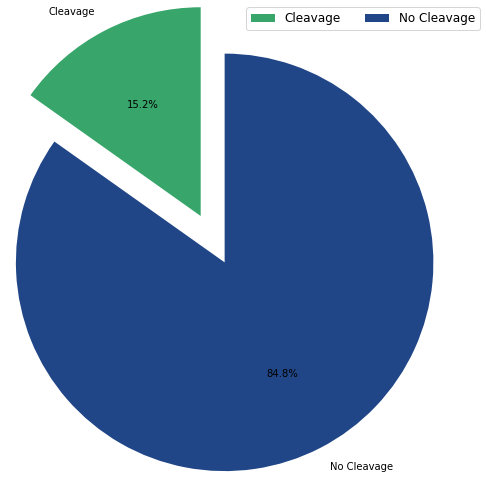

In [37]:
y_axis= np.array([p_count, total]) #create array of y axis values
mycolors = ["#38a66a","#204687"] #create array of colors
plt.figure(figsize=(8, 8)) #set figure size
plt.pie(y_axis, labels=["Cleavage", "No Cleavage"], autopct='%1.1f%%' , colors=mycolors, startangle=90, explode=[0.3, 0], radius=1.2,) #plot pie chart
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=12, ncol=2) #set legend      
plt.show() #show plot

In [38]:
df['cleavage_sites'] = df['Sequence'].str.findall(r".(?:(?<![KR](?!P)).)*") #find all cleavage sites in peptide sequence
df['cleavage_sites'] = [','.join(map(str, l)) for l in df['cleavage_sites']] #convert list to string
df['missed'] = df.cleavage_sites.str.count(',') #count number of missed cleavage sites
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified,Q9NQS7,Q9NQS7,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,True,127,154,K,K,KK,AAAAAAAATMALAAPSSPTPESPTMLTK,0
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,26,R,K,RK,AAAAAAAGDSDSWDADAFSVEDPVR,0
2,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,V,KV,"AAAAAAAGDSDSWDADAFSVEDPVR,K",1
3,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,S,KS,AAAAAAALQAK,0
4,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term),Q96P70,Q96P70,MAAAAAAGAASGLPGPVAQGLKEALVDTLTGILSPVQEVRAAAEEQ...,True,2,22,K,E,KE,AAAAAAGAASGLPGPVAQGLK,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,HAT1,Unmodified,O14929,O14929,MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLEN...,True,263,280,K,S,KS,YYTEFPTVLDITAEDPSK,0
40727,YYTGNYDQYVK,ABCF2,Unmodified,Q9UG63,Q9UG63,MPSDLAKKKAAKKKEAAKARQRPRKGHEENGDVVTEPQVAEKNEAN...,True,305,315,K,T,KT,YYTGNYDQYVK,0
40728,YYTLEEIQK,CYB5A,Unmodified,P00167,P00167,MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPG...,True,11,19,K,H,KH,YYTLEEIQK,0
40729,YYTLFGR,EPRS1,Unmodified,P07814,P07814,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...,True,1504,1510,R,S,RS,YYTLFGR,0


In [39]:
cleavage= r".*?([RK]),.*"
second_cleavage= r".*[RK],.*([RK]),.*"
df['MS_AA']= df.cleavage_sites.str.findall(cleavage)
df['MS_AA']= df['MS_AA'].apply(list_to_string)
df['2nd_cleavage']= df.cleavage_sites.str.findall(second_cleavage)
df['2nd_cleavage']= df['2nd_cleavage'].apply(list_to_string)
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified,Q9NQS7,Q9NQS7,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,True,127,154,K,K,KK,AAAAAAAATMALAAPSSPTPESPTMLTK,0,,
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,26,R,K,RK,AAAAAAAGDSDSWDADAFSVEDPVR,0,,
2,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,V,KV,"AAAAAAAGDSDSWDADAFSVEDPVR,K",1,R,
3,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,S,KS,AAAAAAALQAK,0,,
4,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term),Q96P70,Q96P70,MAAAAAAGAASGLPGPVAQGLKEALVDTLTGILSPVQEVRAAAEEQ...,True,2,22,K,E,KE,AAAAAAGAASGLPGPVAQGLK,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,HAT1,Unmodified,O14929,O14929,MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLEN...,True,263,280,K,S,KS,YYTEFPTVLDITAEDPSK,0,,
40727,YYTGNYDQYVK,ABCF2,Unmodified,Q9UG63,Q9UG63,MPSDLAKKKAAKKKEAAKARQRPRKGHEENGDVVTEPQVAEKNEAN...,True,305,315,K,T,KT,YYTGNYDQYVK,0,,
40728,YYTLEEIQK,CYB5A,Unmodified,P00167,P00167,MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPG...,True,11,19,K,H,KH,YYTLEEIQK,0,,
40729,YYTLFGR,EPRS1,Unmodified,P07814,P07814,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...,True,1504,1510,R,S,RS,YYTLFGR,0,,


In [40]:
missed_cleavage= r".*?([RK]),.*"

In [41]:
def split_cleavage_sites(row):  #function to split  cleavage sites
    if row == 'nan':
        return row
    else:
        return row.split(',')

def second_split(cs_split): #function to seperate 2nd cleavage site
    if len(cs_split) >2:
        return cs_split[1]
    else:
        return ''

In [42]:
df['cs_split'] = df['cleavage_sites'].apply(split_cleavage_sites) #split cleavage sites
df['first_half']= df['cs_split'].apply(lambda x: x[0]) # first half of cleavage sites
df['second_half']= df['cs_split'].apply(second_split) #second half of cleavage sites
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified,Q9NQS7,Q9NQS7,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,True,127,154,K,K,KK,AAAAAAAATMALAAPSSPTPESPTMLTK,0,,,[AAAAAAAATMALAAPSSPTPESPTMLTK],AAAAAAAATMALAAPSSPTPESPTMLTK,
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,26,R,K,RK,AAAAAAAGDSDSWDADAFSVEDPVR,0,,,[AAAAAAAGDSDSWDADAFSVEDPVR],AAAAAAAGDSDSWDADAFSVEDPVR,
2,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,V,KV,"AAAAAAAGDSDSWDADAFSVEDPVR,K",1,R,,"[AAAAAAAGDSDSWDADAFSVEDPVR, K]",AAAAAAAGDSDSWDADAFSVEDPVR,
3,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,S,KS,AAAAAAALQAK,0,,,[AAAAAAALQAK],AAAAAAALQAK,
4,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term),Q96P70,Q96P70,MAAAAAAGAASGLPGPVAQGLKEALVDTLTGILSPVQEVRAAAEEQ...,True,2,22,K,E,KE,AAAAAAGAASGLPGPVAQGLK,0,,,[AAAAAAGAASGLPGPVAQGLK],AAAAAAGAASGLPGPVAQGLK,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,HAT1,Unmodified,O14929,O14929,MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLEN...,True,263,280,K,S,KS,YYTEFPTVLDITAEDPSK,0,,,[YYTEFPTVLDITAEDPSK],YYTEFPTVLDITAEDPSK,
40727,YYTGNYDQYVK,ABCF2,Unmodified,Q9UG63,Q9UG63,MPSDLAKKKAAKKKEAAKARQRPRKGHEENGDVVTEPQVAEKNEAN...,True,305,315,K,T,KT,YYTGNYDQYVK,0,,,[YYTGNYDQYVK],YYTGNYDQYVK,
40728,YYTLEEIQK,CYB5A,Unmodified,P00167,P00167,MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPG...,True,11,19,K,H,KH,YYTLEEIQK,0,,,[YYTLEEIQK],YYTLEEIQK,
40729,YYTLFGR,EPRS1,Unmodified,P07814,P07814,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...,True,1504,1510,R,S,RS,YYTLFGR,0,,,[YYTLFGR],YYTLFGR,


In [43]:
def cs_split(first_half, start, MS_AA):
    if MS_AA == '':
        return 0 
    else:
        return start + len(first_half)-1
        


def split_second(first_half, start, MS_AA):
    if MS_AA == '':
        return 0 
    else:
        return start + len(first_half)

In [44]:
df['position_MS']= df.apply(lambda row: cs_split(row['first_half'], row['start'], row['MS_AA']), axis=1)
df['2nd_MS'] = df.apply(lambda row: split_second(row['second_half'], row['position_MS'], row['2nd_cleavage']), axis=1)
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,...,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half,position_MS,2nd_MS
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified,Q9NQS7,Q9NQS7,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,True,127,154,K,...,KK,AAAAAAAATMALAAPSSPTPESPTMLTK,0,,,[AAAAAAAATMALAAPSSPTPESPTMLTK],AAAAAAAATMALAAPSSPTPESPTMLTK,,0,0
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,26,R,...,RK,AAAAAAAGDSDSWDADAFSVEDPVR,0,,,[AAAAAAAGDSDSWDADAFSVEDPVR],AAAAAAAGDSDSWDADAFSVEDPVR,,0,0
2,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,...,KV,"AAAAAAAGDSDSWDADAFSVEDPVR,K",1,R,,"[AAAAAAAGDSDSWDADAFSVEDPVR, K]",AAAAAAAGDSDSWDADAFSVEDPVR,,26,0
3,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,...,KS,AAAAAAALQAK,0,,,[AAAAAAALQAK],AAAAAAALQAK,,0,0
4,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term),Q96P70,Q96P70,MAAAAAAGAASGLPGPVAQGLKEALVDTLTGILSPVQEVRAAAEEQ...,True,2,22,K,...,KE,AAAAAAGAASGLPGPVAQGLK,0,,,[AAAAAAGAASGLPGPVAQGLK],AAAAAAGAASGLPGPVAQGLK,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,HAT1,Unmodified,O14929,O14929,MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLEN...,True,263,280,K,...,KS,YYTEFPTVLDITAEDPSK,0,,,[YYTEFPTVLDITAEDPSK],YYTEFPTVLDITAEDPSK,,0,0
40727,YYTGNYDQYVK,ABCF2,Unmodified,Q9UG63,Q9UG63,MPSDLAKKKAAKKKEAAKARQRPRKGHEENGDVVTEPQVAEKNEAN...,True,305,315,K,...,KT,YYTGNYDQYVK,0,,,[YYTGNYDQYVK],YYTGNYDQYVK,,0,0
40728,YYTLEEIQK,CYB5A,Unmodified,P00167,P00167,MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPG...,True,11,19,K,...,KH,YYTLEEIQK,0,,,[YYTLEEIQK],YYTLEEIQK,,0,0
40729,YYTLFGR,EPRS1,Unmodified,P07814,P07814,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...,True,1504,1510,R,...,RS,YYTLFGR,0,,,[YYTLFGR],YYTLFGR,,0,0


In [45]:
#test_df= test_df.rename({'position_MS':'dssp index'}, axis=1)
df= df.rename({'Entry':'ProteinID'}, axis=1)
df

,Sequence,Proteins,Modifications,ProteinID,Identifier,Protein_Sequence,Check,start,end,last_AA,...,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half,position_MS,2nd_MS
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified,Q9NQS7,Q9NQS7,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,True,127,154,K,...,KK,AAAAAAAATMALAAPSSPTPESPTMLTK,0,,,[AAAAAAAATMALAAPSSPTPESPTMLTK],AAAAAAAATMALAAPSSPTPESPTMLTK,,0,0
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,26,R,...,RK,AAAAAAAGDSDSWDADAFSVEDPVR,0,,,[AAAAAAAGDSDSWDADAFSVEDPVR],AAAAAAAGDSDSWDADAFSVEDPVR,,0,0
2,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,...,KV,"AAAAAAAGDSDSWDADAFSVEDPVR,K",1,R,,"[AAAAAAAGDSDSWDADAFSVEDPVR, K]",AAAAAAAGDSDSWDADAFSVEDPVR,,26,0
3,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,...,KS,AAAAAAALQAK,0,,,[AAAAAAALQAK],AAAAAAALQAK,,0,0
4,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term),Q96P70,Q96P70,MAAAAAAGAASGLPGPVAQGLKEALVDTLTGILSPVQEVRAAAEEQ...,True,2,22,K,...,KE,AAAAAAGAASGLPGPVAQGLK,0,,,[AAAAAAGAASGLPGPVAQGLK],AAAAAAGAASGLPGPVAQGLK,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,HAT1,Unmodified,O14929,O14929,MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLEN...,True,263,280,K,...,KS,YYTEFPTVLDITAEDPSK,0,,,[YYTEFPTVLDITAEDPSK],YYTEFPTVLDITAEDPSK,,0,0
40727,YYTGNYDQYVK,ABCF2,Unmodified,Q9UG63,Q9UG63,MPSDLAKKKAAKKKEAAKARQRPRKGHEENGDVVTEPQVAEKNEAN...,True,305,315,K,...,KT,YYTGNYDQYVK,0,,,[YYTGNYDQYVK],YYTGNYDQYVK,,0,0
40728,YYTLEEIQK,CYB5A,Unmodified,P00167,P00167,MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPG...,True,11,19,K,...,KH,YYTLEEIQK,0,,,[YYTLEEIQK],YYTLEEIQK,,0,0
40729,YYTLFGR,EPRS1,Unmodified,P07814,P07814,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...,True,1504,1510,R,...,RS,YYTLFGR,0,,,[YYTLFGR],YYTLFGR,,0,0


In [46]:
df.to_csv('newDF.csv', index = False, header=True) #write to csv file

In [47]:
#df= df.filter(['Sequence', 'Protein_Sequence', 'Proteins', 'ProteinID', 'start', 'end', 'cleavage_sites', 'missed', 'MS_AA', '2nd_cleavage'  ,'position_MS', '2nd_MS'], axis=1)

In [48]:
df

,Sequence,Proteins,Modifications,ProteinID,Identifier,Protein_Sequence,Check,start,end,last_AA,...,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half,position_MS,2nd_MS
0,AAAAAAAATMALAAPSSPTPESPTMLTK,INCENP,Unmodified,Q9NQS7,Q9NQS7,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,True,127,154,K,...,KK,AAAAAAAATMALAAPSSPTPESPTMLTK,0,,,[AAAAAAAATMALAAPSSPTPESPTMLTK],AAAAAAAATMALAAPSSPTPESPTMLTK,,0,0
1,AAAAAAAGDSDSWDADAFSVEDPVR,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,26,R,...,RK,AAAAAAAGDSDSWDADAFSVEDPVR,0,,,[AAAAAAAGDSDSWDADAFSVEDPVR],AAAAAAAGDSDSWDADAFSVEDPVR,,0,0
2,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,...,KV,"AAAAAAAGDSDSWDADAFSVEDPVR,K",1,R,,"[AAAAAAAGDSDSWDADAFSVEDPVR, K]",AAAAAAAGDSDSWDADAFSVEDPVR,,26,0
3,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,...,KS,AAAAAAALQAK,0,,,[AAAAAAALQAK],AAAAAAALQAK,,0,0
4,AAAAAAGAASGLPGPVAQGLK,IPO9,Acetyl (Protein N-term),Q96P70,Q96P70,MAAAAAAGAASGLPGPVAQGLKEALVDTLTGILSPVQEVRAAAEEQ...,True,2,22,K,...,KE,AAAAAAGAASGLPGPVAQGLK,0,,,[AAAAAAGAASGLPGPVAQGLK],AAAAAAGAASGLPGPVAQGLK,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,HAT1,Unmodified,O14929,O14929,MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLEN...,True,263,280,K,...,KS,YYTEFPTVLDITAEDPSK,0,,,[YYTEFPTVLDITAEDPSK],YYTEFPTVLDITAEDPSK,,0,0
40727,YYTGNYDQYVK,ABCF2,Unmodified,Q9UG63,Q9UG63,MPSDLAKKKAAKKKEAAKARQRPRKGHEENGDVVTEPQVAEKNEAN...,True,305,315,K,...,KT,YYTGNYDQYVK,0,,,[YYTGNYDQYVK],YYTGNYDQYVK,,0,0
40728,YYTLEEIQK,CYB5A,Unmodified,P00167,P00167,MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPG...,True,11,19,K,...,KH,YYTLEEIQK,0,,,[YYTLEEIQK],YYTLEEIQK,,0,0
40729,YYTLFGR,EPRS1,Unmodified,P07814,P07814,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...,True,1504,1510,R,...,RS,YYTLFGR,0,,,[YYTLFGR],YYTLFGR,,0,0


In [49]:
df.to_csv('MS_df.csv', index = False, header=True) #write to csv file

In [50]:
df_model= df.filter(['Protein_Sequence', 'Proteins', 'ProteinID', 'start', 'end', 'cleavage_sites', 'MS_AA','position_MS','next_AA'], axis=1)

In [51]:
df_model

,Protein_Sequence,Proteins,ProteinID,start,end,cleavage_sites,MS_AA,position_MS,next_AA
0,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,INCENP,Q9NQS7,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,,0,K
1,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,EIF3J,O75822,2,26,AAAAAAAGDSDSWDADAFSVEDPVR,,0,K
2,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,EIF3J,O75822,2,27,"AAAAAAAGDSDSWDADAFSVEDPVR,K",R,26,V
3,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,RPL4,P36578,354,364,AAAAAAALQAK,,0,S
4,MAAAAAAGAASGLPGPVAQGLKEALVDTLTGILSPVQEVRAAAEEQ...,IPO9,Q96P70,2,22,AAAAAAGAASGLPGPVAQGLK,,0,E
...,...,...,...,...,...,...,...,...,...
40726,MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLEN...,HAT1,O14929,263,280,YYTEFPTVLDITAEDPSK,,0,S
40727,MPSDLAKKKAAKKKEAAKARQRPRKGHEENGDVVTEPQVAEKNEAN...,ABCF2,Q9UG63,305,315,YYTGNYDQYVK,,0,T
40728,MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPG...,CYB5A,P00167,11,19,YYTLEEIQK,,0,H
40729,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...,EPRS1,P07814,1504,1510,YYTLFGR,,0,S


In [52]:
df_model= df_model.rename({'position_MS':'MC_position', 'MS_AA':'Missed_Cleavage_AA'}, axis=1)
df_model.to_csv('MS_model.csv', index = False, header=True) #write to csv file

In [53]:
df_model

,Protein_Sequence,Proteins,ProteinID,start,end,cleavage_sites,Missed_Cleavage_AA,MC_position,next_AA
0,MGTTAPGPIHLLELCDQKLMEFLCNMDNKDLVWLEEIQEEAERMFT...,INCENP,Q9NQS7,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,,0,K
1,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,EIF3J,O75822,2,26,AAAAAAAGDSDSWDADAFSVEDPVR,,0,K
2,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,EIF3J,O75822,2,27,"AAAAAAAGDSDSWDADAFSVEDPVR,K",R,26,V
3,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,RPL4,P36578,354,364,AAAAAAALQAK,,0,S
4,MAAAAAAGAASGLPGPVAQGLKEALVDTLTGILSPVQEVRAAAEEQ...,IPO9,Q96P70,2,22,AAAAAAGAASGLPGPVAQGLK,,0,E
...,...,...,...,...,...,...,...,...,...
40726,MAGFGAMEKFLVEYKSAVEKKLAEYKCNTNTAIELKLVRFPEDLEN...,HAT1,O14929,263,280,YYTEFPTVLDITAEDPSK,,0,S
40727,MPSDLAKKKAAKKKEAAKARQRPRKGHEENGDVVTEPQVAEKNEAN...,ABCF2,Q9UG63,305,315,YYTGNYDQYVK,,0,T
40728,MAEQSDEAVKYYTLEEIQKHNHSKSTWLILHHKVYDLTKFLEEHPG...,CYB5A,P00167,11,19,YYTLEEIQK,,0,H
40729,MATLSLTVNSGDPPLGALLAVEHVKDDVSISVEEGKENILHVSENV...,EPRS1,P07814,1504,1510,YYTLFGR,,0,S


In [54]:
df = df.filter(['Sequence', 'ProteinID','Modifications', 'start', 'end', 'cleavage_sites','MS_AA','position_MS', 'missed'])
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed
0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,,0,0
1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,,0,0
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,"AAAAAAAGDSDSWDADAFSVEDPVR,K",R,26,1
3,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,,0,0
4,AAAAAAGAASGLPGPVAQGLK,Q96P70,Acetyl (Protein N-term),2,22,AAAAAAGAASGLPGPVAQGLK,,0,0
...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,,0,0
40727,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,,0,0
40728,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,,0,0
40729,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,,0,0


In [55]:
df.cleavage_sites = df.cleavage_sites.str.split(',')                                                                
df= df.explode('cleavage_sites')

In [56]:
def fill_empty_MS_AA(row):
    if row['MS_AA'] == '':
        last_amino_acid = row['Sequence'][-1]
        return last_amino_acid
    else:
        return row['MS_AA']

In [57]:
df['MS_AA'] = df.apply(lambda row: fill_empty_MS_AA(row), axis=1)

In [58]:
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed
0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,K,0,0
1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,R,0,0
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,R,26,1
3,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,0,0
...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,K,0,0
40727,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,K,0,0
40728,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,K,0,0
40729,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,0,0


In [59]:
df = df[df.missed != 2]

In [60]:
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed
0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,K,0,0
1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,R,0,0
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,R,26,1
3,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,0,0
...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,K,0,0
40727,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,K,0,0
40728,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,K,0,0
40729,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,0,0


In [61]:
df['ProteinID_s'] = df['ProteinID'].shift(1)
df['start_s'] = df['start'].shift(1)
df['end_s'] = df['end'].shift(1)


In [62]:
df['duplicate'] = (df['ProteinID'] == df['ProteinID_s']) & (df['start'] == df['start_s']) & (df['end'] == df['end_s'])


In [63]:
def change_values(row): #function to change values
    if row['duplicate'] == True:
        row['missed'] = 0
        row['MS_AA'] = row['Sequence'][-1]
        row['position_MS'] = row['end']
        return row
    else:
        return row
        
def fill_empty_position_MS(row): #function to fill empty position_MS
    if row['position_MS'] == 0:
        row['position_MS'] = row['end']
        return row
    else:
        return row 

In [64]:
df = df.apply(lambda row: change_values(row), axis=1) #apply function to change values
df = df.apply(lambda row: fill_empty_position_MS(row), axis=1)


In [65]:
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed,ProteinID_s,start_s,end_s,duplicate
0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,K,154,0,NaN,NaN,NaN,False
1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,0,Q9NQS7,127.0,154.0,False
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,O75822,2.0,26.0,False
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,O75822,2.0,27.0,True
3,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,364,0,O75822,2.0,27.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,K,280,0,Q96SB8,649.0,658.0,False
40727,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,K,315,0,O14929,263.0,280.0,False
40728,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,K,19,0,Q9UG63,305.0,315.0,False
40729,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,1510,0,P00167,11.0,19.0,False


In [66]:
df= df.rename({'MS_AA':'Last_AA', 'missed':'Cleavage', 'position_MS':'LastAA_position' }, axis=1)

In [67]:
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,ProteinID_s,start_s,end_s,duplicate
0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,K,154,0,NaN,NaN,NaN,False
1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,0,Q9NQS7,127.0,154.0,False
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,O75822,2.0,26.0,False
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,O75822,2.0,27.0,True
3,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,364,0,O75822,2.0,27.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,K,280,0,Q96SB8,649.0,658.0,False
40727,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,K,315,0,O14929,263.0,280.0,False
40728,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,K,19,0,Q9UG63,305.0,315.0,False
40729,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,1510,0,P00167,11.0,19.0,False


In [68]:
df = df.filter(['Sequence', 'ProteinID','Modifications', 'start', 'end', 'cleavage_sites','Last_AA','LastAA_position', 'Cleavage'])
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage
0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,K,154,0
1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,0
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0
3,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,364,0
...,...,...,...,...,...,...,...,...,...
40726,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,K,280,0
40727,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,K,315,0
40728,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,K,19,0
40729,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,1510,0


In [69]:
df.to_csv('MS_df.csv', index = False, header=True) #write to csv file